# Data Scientist Professional Case Study

### Company Background

Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

**<div align="center"> Data dictionnary</div>**
<div align="center">
<table style="border: 1px solid black; text-align:center">
  <tr style="border: 1px solid black; text-align:center">
    <th style="border: 1px solid black; text-align:center">Column Name</th>
    <th style="border: 1px solid black; text-align:center">Details</th>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">id</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the unique identification number of the property</td>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">latitude</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the latitude of the property</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">longitude</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the longitude of the property</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">property_type</td>
    <td style="border: 1px solid black; text-align:center">Character, the type of property (e.g., apartment, house, etc)</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">room_type</td>
    <td style="border: 1px solid black; text-align:center">Character, the type of room (e.g., private room, entire home, etc)</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">bathrooms</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the number of bathrooms</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">bedrooms</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the number of bedrooms</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">minimum_nights</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the minimum number of nights someone can book</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">price</td>
    <td style="border: 1px solid black; text-align:center">Character, the dollars per night charged</td>


  </tr>
</table>
</div>

# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns


from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

%matplotlib inline

# Functions

In [2]:
def succes_test(x):
    """Permet de savoir si on a respecté le criètre de succès de la prédiction de 25$
    param: 
    x (int): différence absolue entra la valeur réel et la prédiction du prix
    
    return:
    y(str)
    """
    if abs(x) <= 25:
        y = 'Succes'
    else:
        y = 'Not succes'
    return y

# DataFrame creation

In [3]:
df = pd.read_csv('data/rentals.csv')

In [4]:
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


# Exploratory analysis

In this section, we will explore the data and clean the database. We will proceed with recoding if necessary.

In [5]:
df.shape

(8111, 9)

We have 8111 observations in the database and 8 variables (we will not use the variable 'id' which only allows to identify the dwellings)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


Most of our variables are quantitative except 'property_type', 'room_type' and 'price' which are qualitative. However, we will transform the variable 'price' into a numerical one.

In [7]:
df = df.drop(['id'], axis=1)

In [8]:
df.price = df.price.apply(lambda x: int(x.strip()\
                                        .split('.')[0]\
                                        .replace('$', '')\
                                        .replace(',', '')))

In [9]:
df.isna().sum()

latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

The variables 'bathrooms' and 'bedrooms' have missing values (less than 0.15%). We will replace these missing values by 0.

In [10]:
df = df.fillna(0)

In [11]:
num_var = []
qual_var = []

for column in df.columns:
    if is_string_dtype(df[column]):
        qual_var.append(column)
    elif is_numeric_dtype(df[column]):
        num_var.append(column)
        
print("Numerical variables: ", num_var)
print("\nQualitative variables: ", qual_var)

Numerical variables:  ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights', 'price']

Qualitative variables:  ['property_type', 'room_type']


## Quantitative variables

In [12]:
df[num_var].describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8111.000000,8111.000000,8111.000000,8111.000000,8.111000e+03,8111.000000
mean,37.766054,-122.430107,1.393910,1.345210,1.234526e+04,225.407101
std,0.022937,0.026967,0.924089,0.925553,1.110357e+06,412.253039
min,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,37.751450,-122.442830,1.000000,1.000000,2.000000e+00,100.000000
50%,37.769150,-122.424650,1.000000,1.000000,4.000000e+00,150.000000
75%,37.785670,-122.410615,1.500000,2.000000,3.000000e+01,240.000000
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


It seems that all variables have outliers.

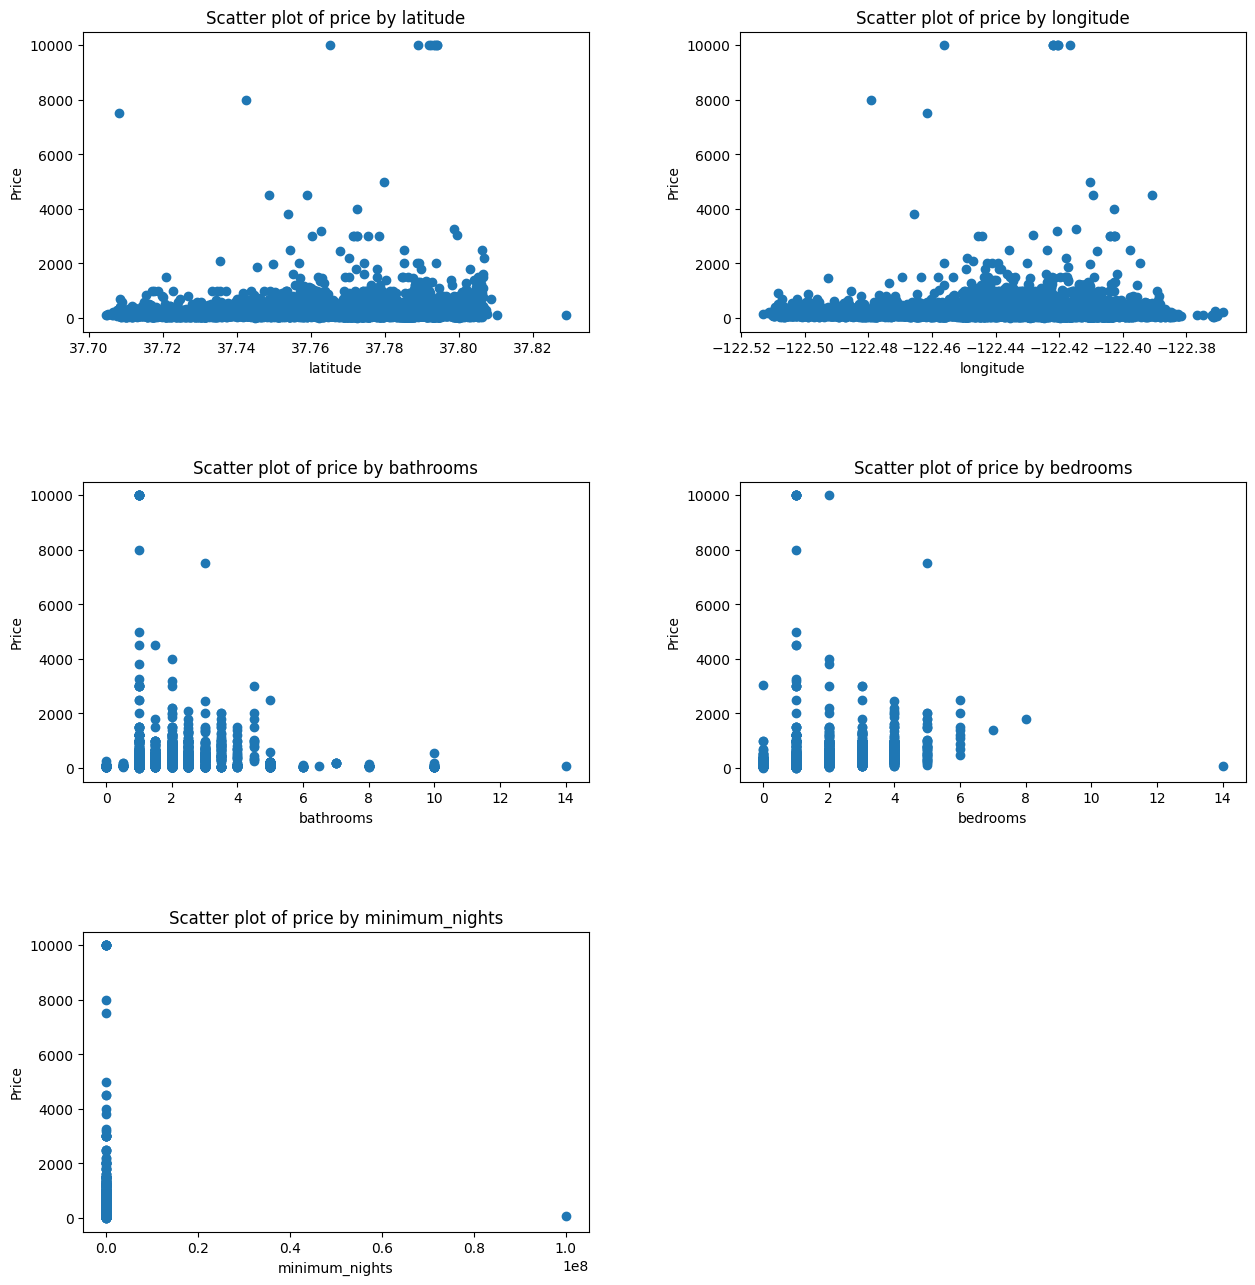

In [13]:
y = df.price
X = [x for x in num_var if x!='price']

plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in X:
    plt.subplot(3, 2, i)
    x = df[p]
    plt.scatter(x, y)
    plt.xlabel(p)
    plt.ylabel('Price')
    title = 'Scatter plot of price by ' + p
    plt.title(title)
    i += 1

plt.show()

These different scatterplots of the 'price' variable with the other numerical variables show that the relationship between this variable and the others is not linear and there could be outliers.

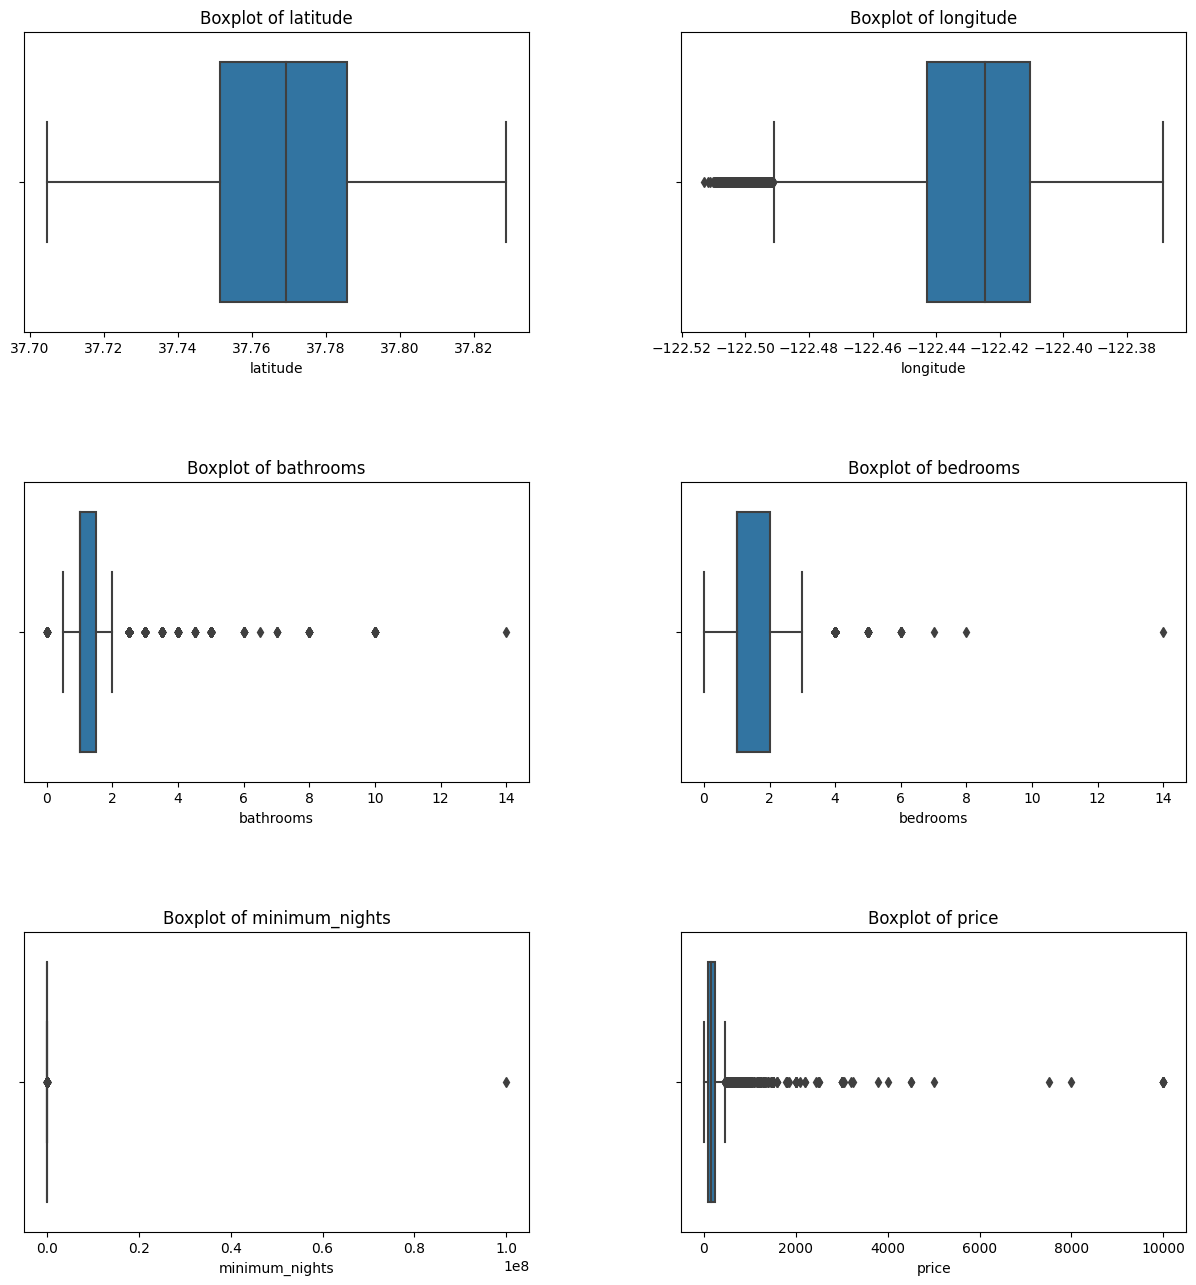

In [14]:
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in num_var:
    plt.subplot(3, 2, i)
    x = df[p]
    sns.boxplot(x)
    title = "Boxplot of " + p
    plt.title(title)
    i += 1

plt.show()

With these different boxplots we can see the distribution of the quantitative variables.
We can see that none of these variables follow a normal distribution, we have asymmetric distributions and we can see outliers.

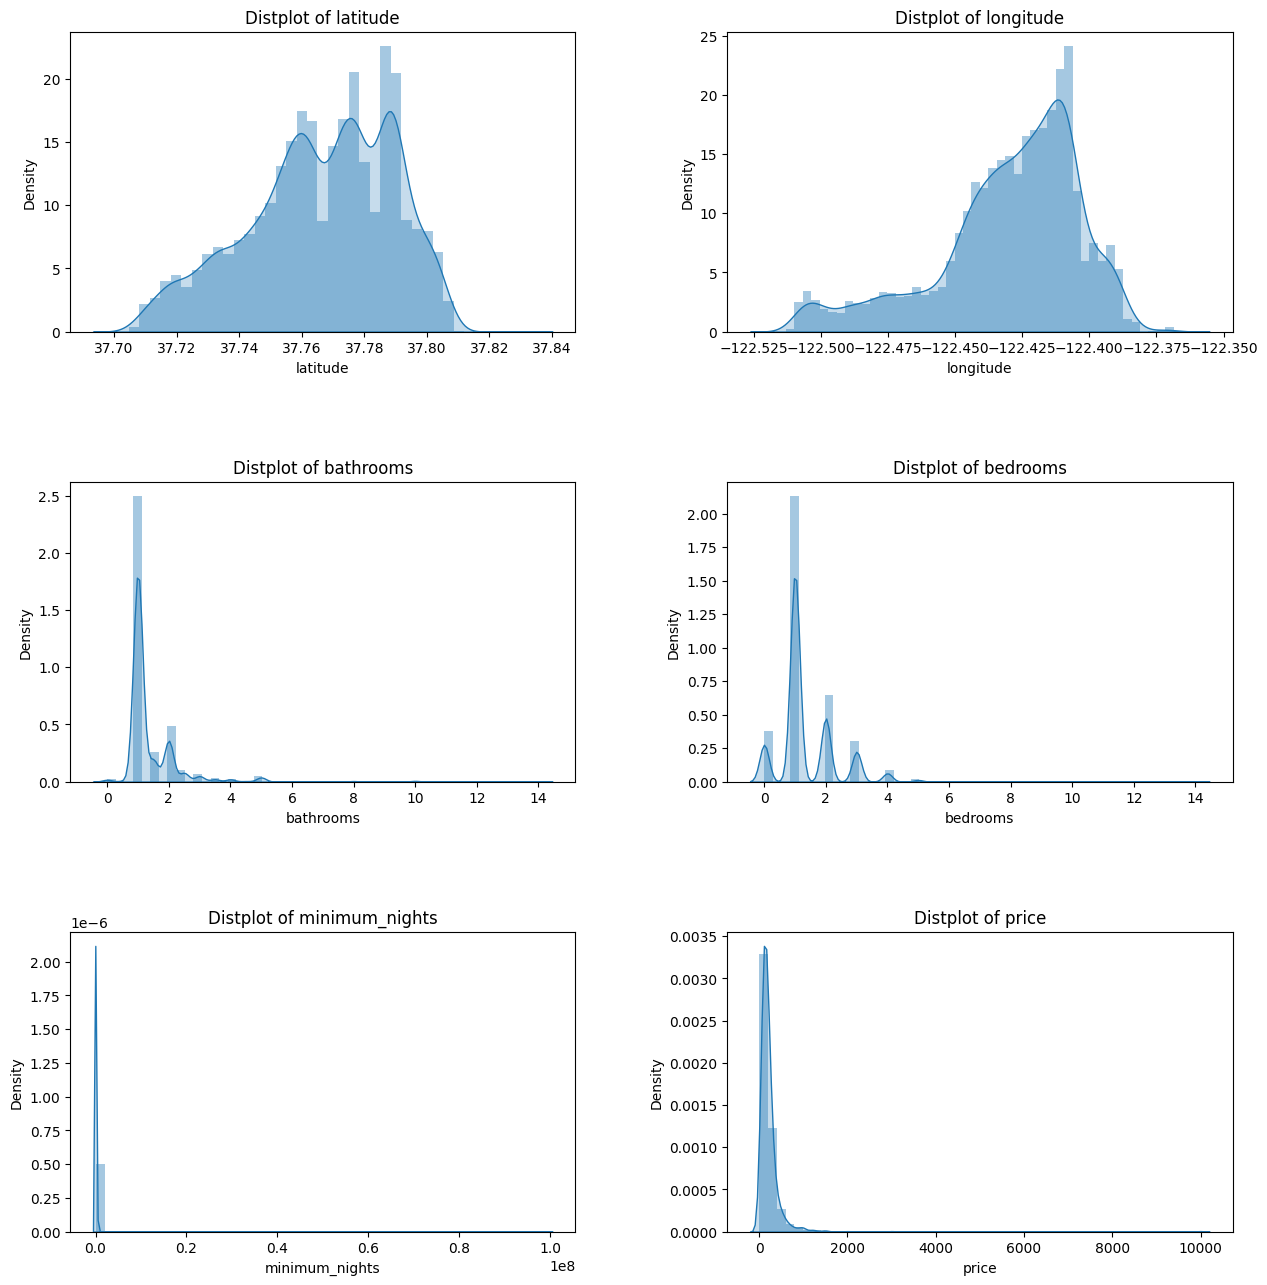

In [15]:
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in num_var:
    plt.subplot(3, 2, i)
    x = df[p]
    sns.distplot(x, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
    title = 'Distplot of ' + p
    plt.title(title)
    i += 1

plt.show()

These histograms show us, like the previous boxplots, that the variables do not follow a normal distribution, that we have asymmetrical distributions and we can see outliers.
We will try to identify these outliers and recode the variables

## Recoding of quantitative variables and removal of outliers

In [16]:
for var in num_var:
    q1 = df[var].quantile(q=0.25)
    q3 = df[var].quantile(q=0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    print(var, ':', ll, ul)
    print(round(len(df[df[var] > ul]) / len(df) * 100, 2), '%', '\n')

latitude : 37.70011999999999 37.83700000000001
0.0 % 

longitude : -122.4911525 -122.36229250000002
0.0 % 

bathrooms : 0.25 2.25
8.42 % 

bedrooms : -0.5 3.5
2.98 % 

minimum_nights : -40.0 72.0
1.02 % 

price : -110.0 450.0
7.19 % 



In [17]:
# print(round(len(df[df['latitude'] >= 37.8]) / len(df) * 100, 2))
# print(round(len(df[df['latitude'] <= 37.6]) / len(df) * 100, 2))

In [18]:
# print(round(len(df[df['longitude'] >= -122.36]) / len(df) * 100, 2))
# print(round(len(df[df['longitude'] <= -122.45]) / len(df) * 100, 2))

In [19]:
print('Big:', round(len(df[df['bathrooms'] >= 3]) / len(df) * 100, 2))
print('Small:', round(len(df[df['bathrooms'] <= 0]) / len(df) * 100, 2))

df['bathrooms'][df['bathrooms'] >= 3] = 3
df['bathrooms'][df['bathrooms'] == 0] = 1

Big: 5.54
Small: 0.62


In [20]:
print('Big:', round(len(df[df['bedrooms'] >= 3]) / len(df) * 100, 2))
print('Small:', round(len(df[df['bedrooms'] <= 0]) / len(df) * 100, 2))

df['bedrooms'][df['bedrooms'] >= 3] = 3
df['bedrooms'][df['bedrooms'] == 0] = 1

Big: 11.54
Small: 10.58


In [21]:
print('Big:', round(len(df[df['minimum_nights'] >= 40]) / len(df) * 100, 2))
print('Small:', round(len(df[df['minimum_nights'] <= 1]) / len(df) * 100, 2))

df['minimum_nights'][df['minimum_nights'] >= 72] = 72

Big: 1.68
Small: 17.62


In [22]:
print('Big:', round(len(df[df['price'] >= 170]) / len(df) * 100, 2))
print('Small:', round(len(df[df['price'] <= 60]) / len(df) * 100, 2))

df['price'][df['price'] >= 170] = 170
df['price'][df['price'] <= 60] = 60

Big: 44.61
Small: 7.39


In [23]:
df[num_var].describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000
mean,37.766054,-122.430107,1.325607,1.412280,15.224387,135.029220
std,0.022937,0.026967,0.579401,0.687867,15.262850,39.851899
min,37.704630,-122.513060,0.500000,1.000000,1.000000,60.000000
25%,37.751450,-122.442830,1.000000,1.000000,2.000000,100.000000
50%,37.769150,-122.424650,1.000000,1.000000,4.000000,150.000000
75%,37.785670,-122.410615,1.500000,2.000000,30.000000,170.000000
max,37.828790,-122.368570,3.000000,3.000000,72.000000,170.000000


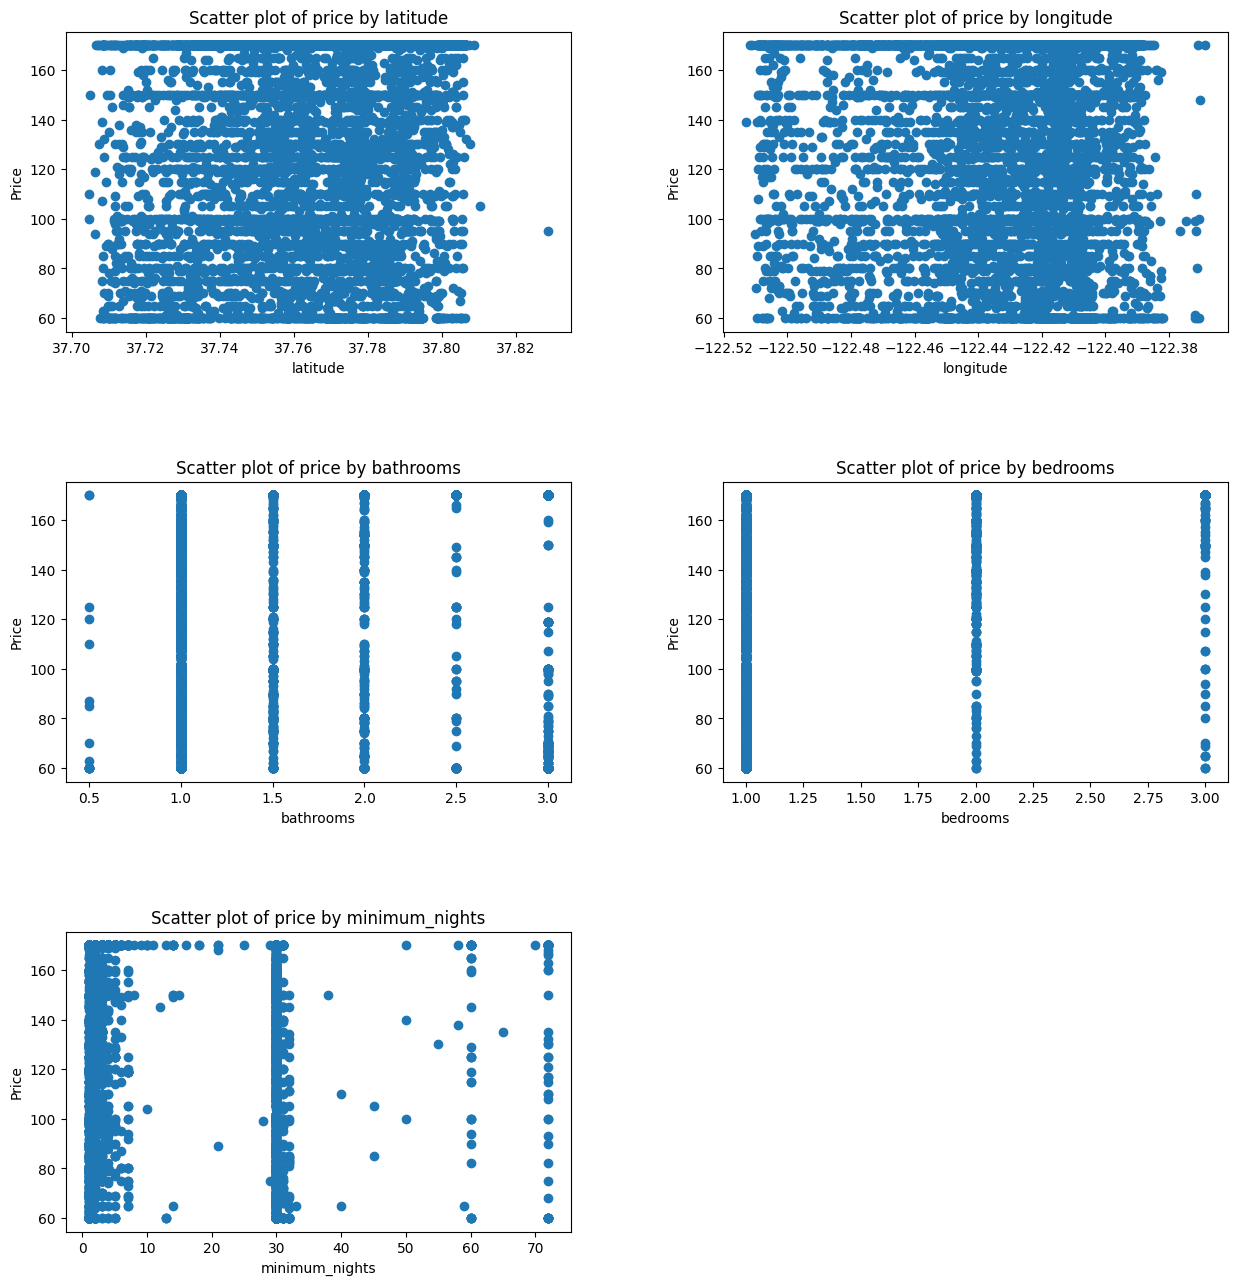

In [24]:
y = df.price
X = [x for x in num_var if x!='price']

plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in X:
    plt.subplot(3, 2, i)
    x = df[p]
    plt.scatter(x, y)
    plt.xlabel(p)
    plt.ylabel('Price')
    title = 'Scatter plot of price by ' + p
    plt.title(title)
    i += 1

plt.show()

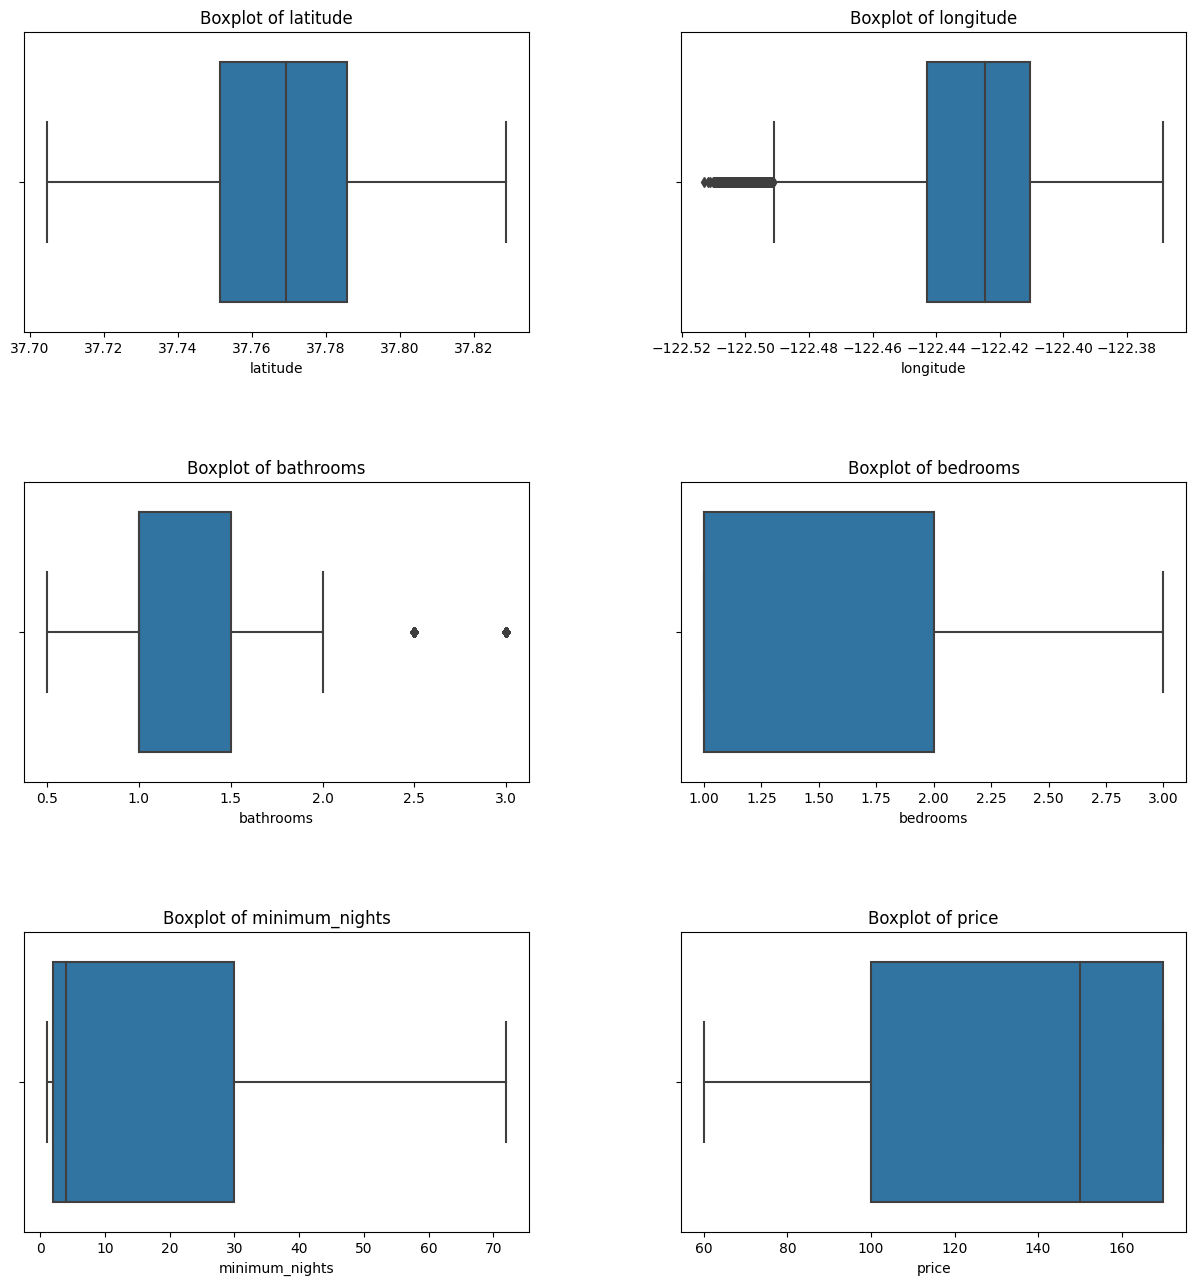

In [25]:
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in num_var:
    plt.subplot(3, 2, i)
    x = df[p]
    sns.boxplot(x)
    title = "Boxplot of " + p
    plt.title(title)
    i += 1

plt.show()

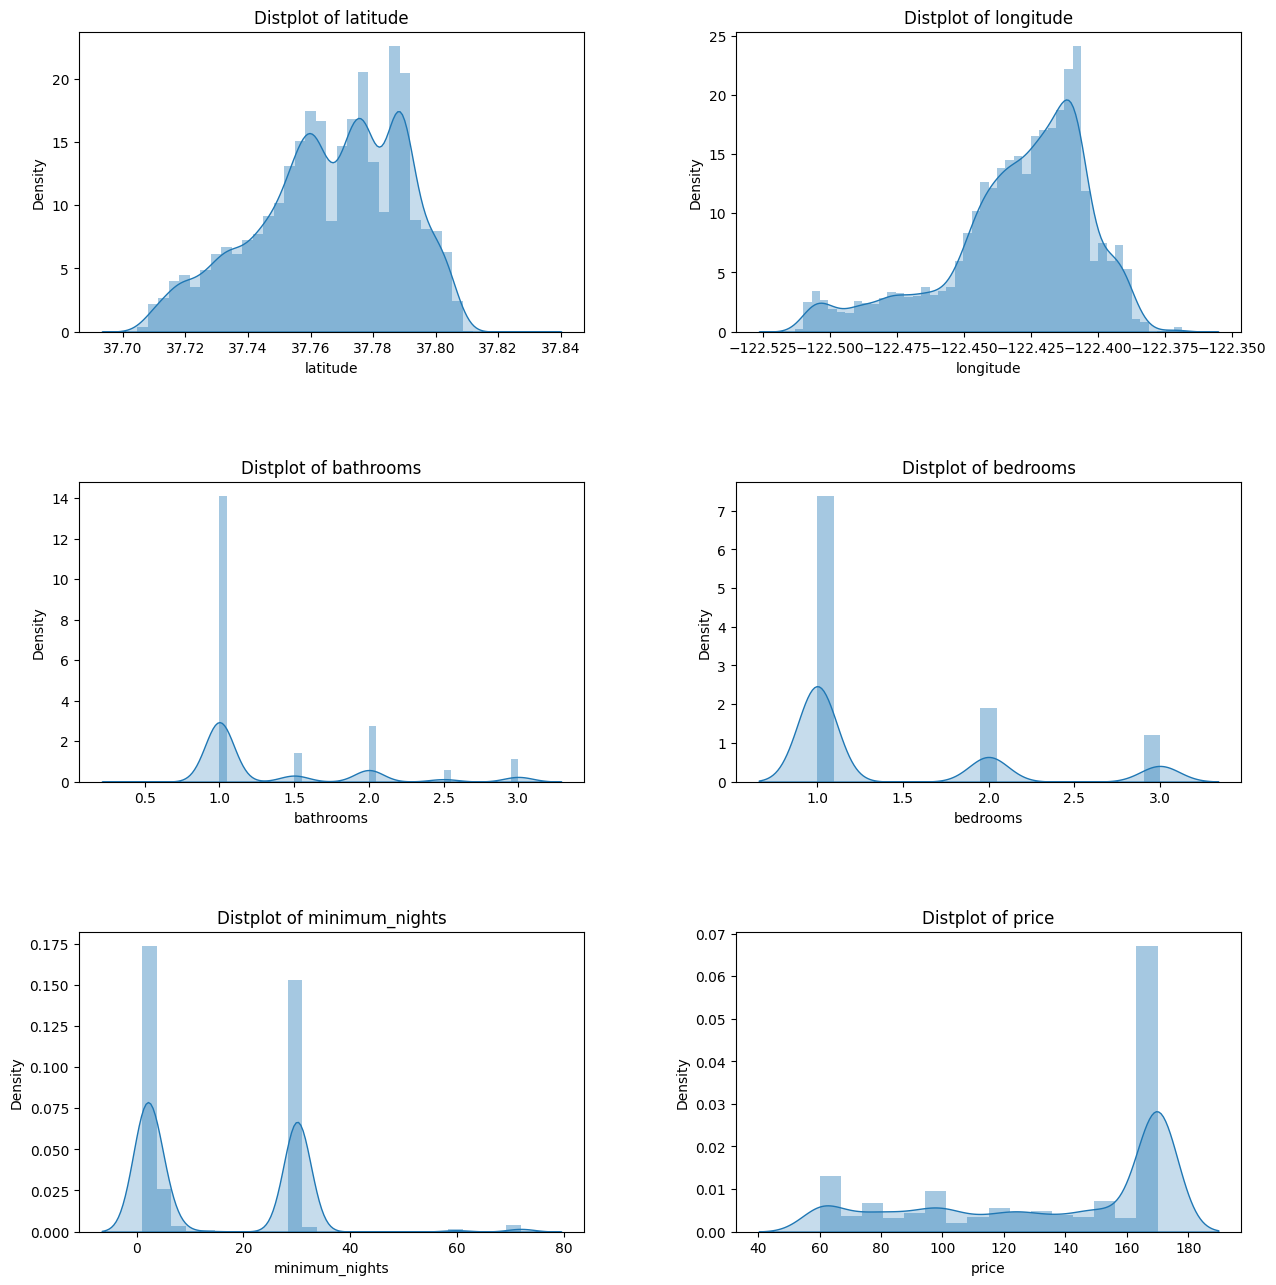

In [26]:
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.5)

i = 1
for p in num_var:
    plt.subplot(3, 2, i)
    x = df[p]
    sns.distplot(x, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
    title = 'Distplot of ' + p
    plt.title(title)
    i += 1

plt.show()

After recoding the variables, we can see that the distributions are less skewed and that there are no more outliers

In [27]:
corr = df[num_var].corr()
corr.style.background_gradient(cmap='coolwarm')

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187411,0.042745,-0.078538,0.181437,0.173178
longitude,0.187411,1.000000,-0.024373,-0.091160,0.113998,0.087530
bathrooms,0.042745,-0.024373,1.000000,0.461496,0.046604,0.036008
bedrooms,-0.078538,-0.091160,0.461496,1.000000,-0.017844,0.454783
minimum_nights,0.181437,0.113998,0.046604,-0.017844,1.000000,-0.106990
price,0.173178,0.087530,0.036008,0.454783,-0.106990,1.000000


This correlogram does not show us any correlated variables.

## Qualitative variables

In [28]:
for col in qual_var:
    print(f"The number of unique values for the variables {col} is {df[col].nunique()}")

The number of unique values for the variables property_type is 26
The number of unique values for the variables room_type is 4


In [29]:
df.property_type.value_counts(normalize=True)*100

Apartment             39.982739
House                 28.529158
Condominium           10.997411
Guest suite            7.113796
Boutique hotel         3.291826
Hotel                  1.935643
Townhouse              1.750709
Serviced apartment     1.491801
Hostel                 1.134262
Loft                   1.084946
Bed and breakfast      0.530144
Guesthouse             0.505486
Aparthotel             0.505486
Other                  0.295894
Bungalow               0.209592
Resort                 0.172605
Cottage                0.147947
Villa                  0.123289
Castle                 0.049316
Cabin                  0.036987
Tiny house             0.036987
Earth house            0.024658
In-law                 0.012329
Camper/RV              0.012329
Dome house             0.012329
Hut                    0.012329
Name: property_type, dtype: float64

The variable 'property_type' has many modalities and some of them are in very low proportions. We will group the modalities that seem to be close.

In [30]:
df.property_type = df.property_type.map({'Apartment': 'Apartment',
                                         'House': 'House',
                                         'Condominium': 'Other',
                                         'Guest suite': 'Other',
                                         'Other': 'Other',
                                         'Townhouse':'House', 
                                         'Loft':'Other', 
                                         'Cottage':'Other', 
                                         'Hostel':'Other', 
                                         'Guesthouse':'House',
                                         'Serviced apartment':'Apartment', 
                                         'Bungalow':'Other', 
                                         'Bed and breakfast':'Other', 
                                         'Hotel':'Other',
                                         'Boutique hotel':'Other',
                                         'Tiny house':'House', 
                                         'Resort':'Other', 
                                         'Villa':'Other',
                                         'Aparthotel':'Apartment', 
                                         'Castle':'Other', 
                                         'Camper/RV':'Other', 
                                         'In-law':'Other', 
                                         'Earth house':'House',
                                         'Cabin':'Other', 
                                         'Dome house':'House', 
                                         'Hut':'Other'
                                        })

In [31]:
df.property_type.value_counts(normalize=True)*100

Apartment    41.980027
House        30.859327
Other        27.160646
Name: property_type, dtype: float64

About 42% of the dwellings are apartments, followed by 31% that are houses and the rest that are other types of dwellings

Text(0.5, 1.0, 'Barplot of property_type')

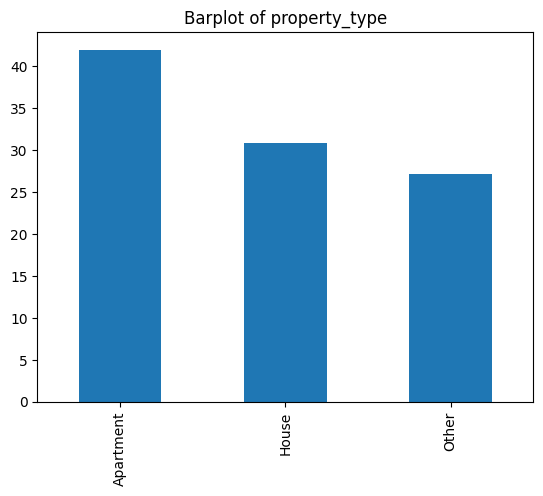

In [32]:
(df.property_type.value_counts(normalize=True)*100).plot(kind='bar')
title = 'Barplot of property_type'
plt.title(title)

In [33]:
df.room_type.value_counts(normalize=True)*100

Entire home/apt    58.833683
Private room       35.642954
Shared room         2.971274
Hotel room          2.552090
Name: room_type, dtype: float64

The modalities 'Shared room' and 'Hotel room' are in very low proportions we will group them with the two other modalities.

In [34]:
df.room_type = df.room_type.map({'Entire home/apt': 'Entire home/apt/Hotel',
                                'Private room': 'Private/Shared room',
                                'Shared room': 'Private/Shared room',
                                'Hotel room': 'Entire home/apt/Hotel',
                                })

In [35]:
df.room_type.value_counts(normalize=True)*100

Entire home/apt/Hotel    61.385772
Private/Shared room      38.614228
Name: room_type, dtype: float64

We see that about 61% of the units are whole units and about 38% are shared units.

Text(0.5, 1.0, 'Barplot of room_type')

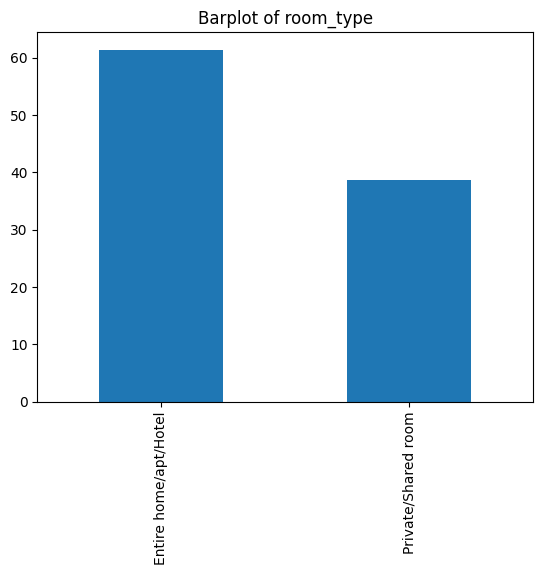

In [36]:
(df.room_type.value_counts(normalize=True)*100).plot(kind='bar')
title = 'Barplot of room_type'
plt.title(title)

In [37]:
df.pivot_table(values='price', index=['property_type'], aggfunc=['mean', sum])

,mean,sum
,price,price
property_type,,
Apartment,137.365639,467730
House,125.958050,315273
Other,141.724467,312219


All types of properties have almost the same average price which is between 125 and 142. However, the houses have the lowest prices followed by the apartments and then the other types.

Text(0.5, 1.0, 'Barplot of mean price by property_type')

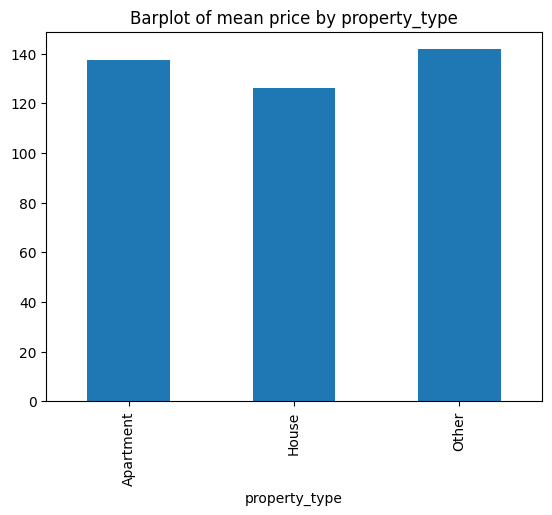

In [38]:
df.groupby('property_type')['price'].mean().plot(kind='bar')
title = 'Barplot of mean price by property_type'
plt.title(title)

In [39]:
df.pivot_table(values='price', index=['room_type'], aggfunc=['mean', sum])

,mean,sum
,price,price
room_type,,
Entire home/apt/Hotel,151.64993,755065
Private/Shared room,108.60696,340157


Whole units are more expensive than shared units (151 and 108 respectively)

Text(0.5, 1.0, 'Barplot of mean price by room_type')

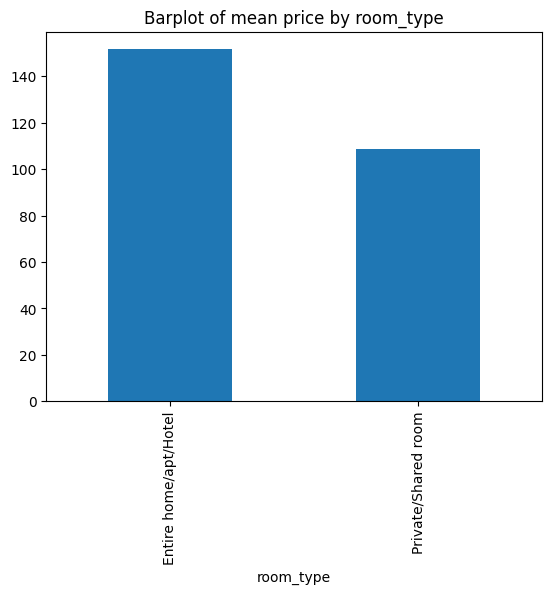

In [40]:
df.groupby('room_type')['price'].mean().plot(kind='bar')
title = 'Barplot of mean price by room_type'
plt.title(title)

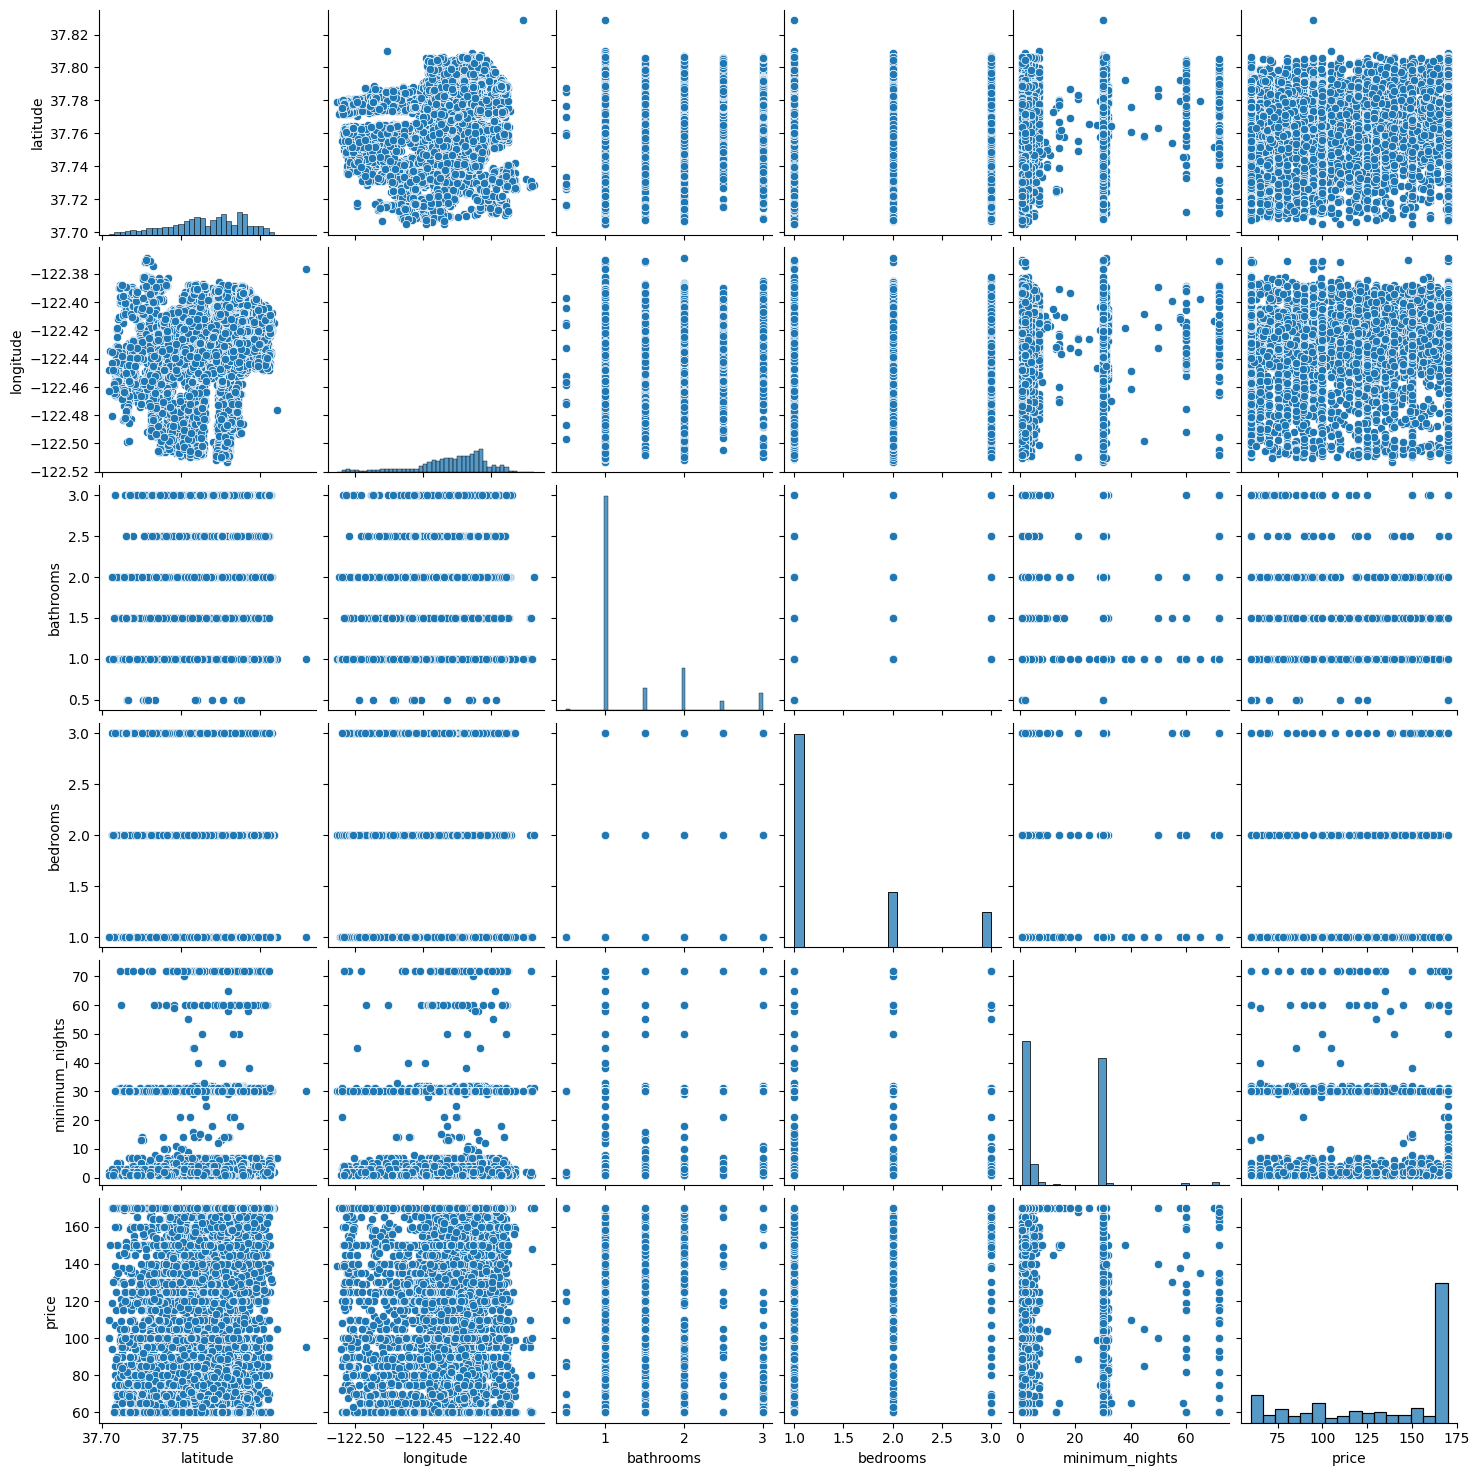

In [41]:
sns.pairplot(df)

# Preprocessing

In this section, we will encode the categorical variables by creating dummies and normalize the quantitative variables using the MinMax technique.

In [42]:
property = pd.get_dummies(df.property_type, prefix='property')
room = pd.get_dummies(df.room_type, prefix='room')

df = pd.concat([df, property, room], axis = 1)
df.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price,property_Apartment,property_House,property_Other,room_Entire home/apt/Hotel,room_Private/Shared room
0,37.76931,-122.43386,Apartment,Entire home/apt/Hotel,1.0,1.0,1,170,1,0,0,1,0
1,37.75402,-122.45805,House,Private/Shared room,1.0,1.0,1,99,0,1,0,0,1
2,37.74511,-122.42102,Apartment,Entire home/apt/Hotel,1.0,2.0,30,170,1,0,0,1,0
3,37.76669,-122.45250,Apartment,Private/Shared room,3.0,1.0,32,65,1,0,0,0,1
4,37.76487,-122.45183,Apartment,Private/Shared room,3.0,1.0,32,65,1,0,0,0,1


In [43]:
scaler = MinMaxScaler()

not_scaled = qual_var + ['price']
var_scaled = [x for x in df.columns if x not in not_scaled]
df[var_scaled] = scaler.fit_transform(df[var_scaled])
df[var_scaled].head()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,property_Apartment,property_House,property_Other,room_Entire home/apt/Hotel,room_Private/Shared room
0,0.520941,0.548135,0.2,0.0,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.397793,0.380718,0.2,0.0,0.000000,0.0,1.0,0.0,0.0,1.0
2,0.326031,0.636999,0.2,0.5,0.408451,1.0,0.0,0.0,1.0,0.0
3,0.499839,0.419129,1.0,0.0,0.436620,1.0,0.0,0.0,0.0,1.0
4,0.485180,0.423766,1.0,0.0,0.436620,1.0,0.0,0.0,0.0,1.0


# Modeling

## Creation of the training and validation dataset

In [44]:
X = df[['latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights',
       'property_Apartment', 'property_House', 'property_Other', 'room_Entire home/apt/Hotel',
       'room_Private/Shared room']]
y = df.price

In [45]:
X.shape

(8111, 10)

In [46]:
y.shape

(8111,)

In [47]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.30)

In [48]:
X_train.head()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,property_Apartment,property_House,property_Other,room_Entire home/apt/Hotel,room_Private/Shared room
5792,0.771182,0.601910,0.2,0.0,0.408451,1.0,0.0,0.0,1.0,0.0
2407,0.656089,0.582808,0.2,0.5,0.408451,0.0,0.0,1.0,1.0,0.0
4367,0.558795,0.509032,0.6,0.5,0.408451,1.0,0.0,0.0,1.0,0.0
4425,0.584166,0.164994,0.2,0.0,0.408451,1.0,0.0,0.0,1.0,0.0
5711,0.181137,0.646342,0.6,1.0,0.028169,1.0,0.0,0.0,1.0,0.0


In [49]:
y_train.head()

5792    170
2407    170
4367    156
4425    120
5711    170
Name: price, dtype: int64

## Model training

We will use a linear regression model and a random forest to predict the price.
Linear regression is the basic model to do a regression. However, the relationship between the price variable and the other variables is not linear so we will use a non-parametric model which is the random forest and compare the results.

### Linear regression

In [50]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
reg.score(X_test, y_test)

0.4352938419805107

### Random forest regression

In [52]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

#### Grid search with Random forest

In [53]:
param_grid = {
            'bootstrap': [True, False],
            'max_depth': [10, 50],
            'max_features': [2, 3],
            'min_samples_leaf': [2, 3],
            'n_estimators': [100, 200]
            }

grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 50],
                         'max_features': [2, 3], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200]},
             verbose=2)

In [54]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 2,
 'n_estimators': 200}

With the grid_search, we could obtain the optimal values of the hyperparameters. We will use them in the following.

In [55]:
rf = grid_rf.best_estimator_

# Model evaluation

In [56]:
print('Linear regression MSE:', round(mean_squared_error(y_test, reg.predict(X_test)), 2))
print('Random forest MSE:    ', round(mean_squared_error(y_test, rf.predict(X_test)), 2), '\n')

print('Linear regression RMSE:', round(mean_squared_error(y_test, reg.predict(X_test), squared=False), 2))
print('Random forest RMSE:    ', round(mean_squared_error(y_test, rf.predict(X_test), squared=False), 2))

Linear regression MSE: 912.79
Random forest MSE:     572.49 

Linear regression RMSE: 30.21
Random forest RMSE:     23.93


We see that the random forest is more accurate than the linear regression. This could be explained by the presence of non-linearity between the price and the other variables.

In [57]:
ind = list(range(200))
sample_ind = random.sample(X_test.index.to_list(), 200)


y = y_test.loc[sample_ind]
X = X_test.loc[sample_ind]

y_pred_reg = reg.predict(X)
y_pred_rf = rf.predict(X)

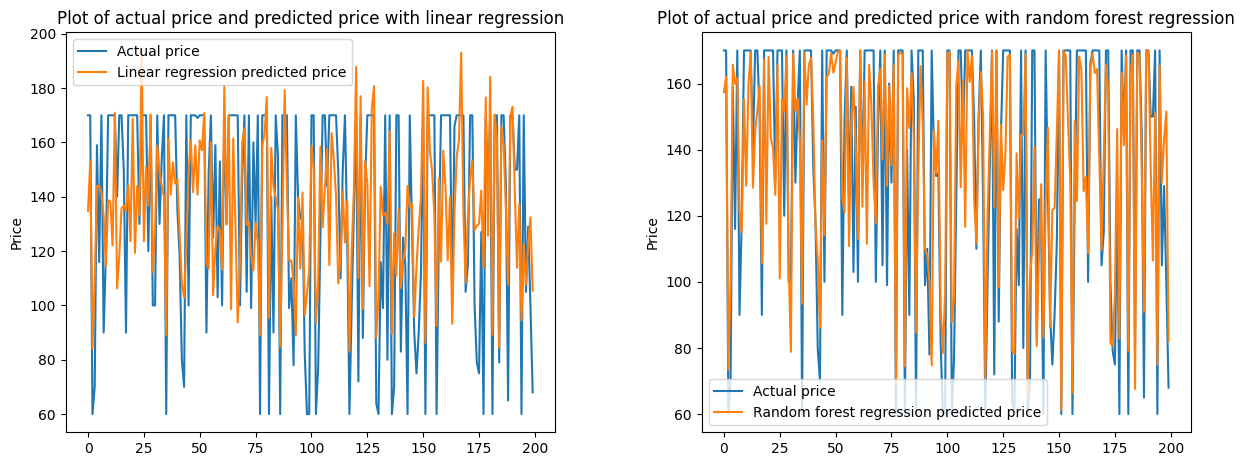

In [58]:
plt.figure(figsize=(6, 5))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 2, top = 0.9, wspace = 0.3, hspace = 0.5)


plt.subplot(1, 2, 1)
plt.plot(ind, y, label='Actual price')
plt.plot(ind, y_pred_reg, label='Linear regression predicted price')
plt.title('Plot of actual price and predicted price with linear regression')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ind, y, label='Actual price')
plt.plot(ind, y_pred_rf, label='Random forest regression predicted price')
plt.title('Plot of actual price and predicted price with random forest regression')
plt.ylabel('Price')
plt.legend()

plt.show()

These graphs confirm the performance of the random forest compared to the linear regression. Indeed, we can see that the predictions with the random forest are more consistent with the real prices.

## Evaluation of the performance of the random forest in relation to the success criteria

In [59]:
X = df[['latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights',
       'property_Apartment', 'property_House', 'property_Other', 'room_Entire home/apt/Hotel',
       'room_Private/Shared room']]

In [60]:
df['predicted_price'] = rf.predict(X).round(2)

In [61]:
df['diff_price'] = df['price'] - df['predicted_price']

In [62]:
df['succes'] = df['diff_price'].apply(lambda x: succes_test(x))

In [63]:
df.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price,property_Apartment,property_House,property_Other,room_Entire home/apt/Hotel,room_Private/Shared room,predicted_price,diff_price,succes
0,0.520941,0.548135,Apartment,Entire home/apt/Hotel,0.2,0.0,0.000000,170,1.0,0.0,0.0,1.0,0.0,163.44,6.56,Succes
1,0.397793,0.380718,House,Private/Shared room,0.2,0.0,0.000000,99,0.0,1.0,0.0,0.0,1.0,102.70,-3.70,Succes
2,0.326031,0.636999,Apartment,Entire home/apt/Hotel,0.2,0.5,0.408451,170,1.0,0.0,0.0,1.0,0.0,148.56,21.44,Succes
3,0.499839,0.419129,Apartment,Private/Shared room,1.0,0.0,0.436620,65,1.0,0.0,0.0,0.0,1.0,71.64,-6.64,Succes
4,0.485180,0.423766,Apartment,Private/Shared room,1.0,0.0,0.436620,65,1.0,0.0,0.0,0.0,1.0,71.48,-6.48,Succes


In [64]:
df['succes'].value_counts(normalize=True)*100

Succes        85.291579
Not succes    14.708421
Name: succes, dtype: float64

The success criterion was met for about 85% of the predictions.

# Conclusion

The goal of this study is to allow Inn the Neighborhood's product manager to increase the percentage of people who come to the site and are interested in renting their home start using it. To do this, we need to develop a model that predicts how much a person could earn by renting their property, while avoiding estimating prices with more than a $25 difference from the actual price, as this could discourage people.

So we have: 

-Did a data analysis: which allowed us to see the behavior of the variables individually and with the price variable and to detect outliers. There were no correlated variables. We tried to recode the variables and to eliminate the outliers.

-We did a simple linear regression and a regression with a random forest: 
    We did a linear regression because linear regression is simple to implement and easier to interpret the output coefficients however it performs well when the relationship between the dependent variable and the independent variables is linear. 
    We used the random forest because it is a non-parametric method so it captures the non-linearity, moreover it is an ensemblistic method so there is less risk of over-learning and in general it gives better performance than the simple models.



We were able to obtain a model that predicts the price with an average error of about 23 dollars. About 85% of the predictions met the success criteria. 

# Recommendation

To have better performances, we could:

-rebalance the database(there are modalities in low proportion or outliers) either by creating artificial observations (oversampling) for the class in minority, or by reducing the observations (downsampling) for the class in majority, or one seeks to complete the database with more observations

-increase the size of the database

-adding more variables to the database

use models that capture non-linearity such as non-parametric methods (Boosting, Bagging, Decision Tree, SVR..)

-Recode qualitative variables with more precision based on a deeper knowledge of the modalities


We can then deploy this model on a server using an api.

#### 